In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#check versions of packages
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.5.3
numpy version: 1.21.5


## Exploring the Data

In [3]:
# Read all sheets directly into an ordered dictionary
filepath = 'C:/Users/kozfa/Data Final Projects 680/Data/GradRates.xlsx'
df_v1 = pd.concat(pd.read_excel(filepath, sheet_name=None), ignore_index=True)

In [4]:
df_v1

,Year,Institution Type,Student Population,Institution Level,Adjusted \ncohort,Completers,Graduation \nrate
0,2010,4-year institutions,All students,Public,1084594,593462,54.7
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7
4,2010,4-year bachelor's cohort,All students,Public,932667,551604,59.1
...,...,...,...,...,...,...,...
355,2018,2-year institutions,Received neither a Pell Grant or a Direct Subs...,Pri-For-profit,16971,10873,64.1
356,2018,Less-than-2-year institutions,All students,Pri-For-profit,114437,77969,68.1
357,2018,Less-than-2-year institutions,Received Pell Grant,Pri-For-profit,81132,54129,66.7
358,2018,Less-than-2-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Pri-For-profit,10313,7789,75.5


In [9]:
# Rename columns, create new dataset version v2
df_v2 = df_v1.rename(columns={'Institution Type':'InstType', 
                            'Student Population': 'StudPop',
                            'Institution Level': 'InstLevel',
                            'Adjusted \ncohort': 'NumStudents',
                            'Graduation \nrate': 'GradRate'})

In [10]:
df_v2

,Year,InstType,StudPop,InstLevel,NumStudents,Completers,GradRate
0,2010,4-year institutions,All students,Public,1084594,593462,54.7
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7
4,2010,4-year bachelor's cohort,All students,Public,932667,551604,59.1
...,...,...,...,...,...,...,...
355,2018,2-year institutions,Received neither a Pell Grant or a Direct Subs...,Pri-For-profit,16971,10873,64.1
356,2018,Less-than-2-year institutions,All students,Pri-For-profit,114437,77969,68.1
357,2018,Less-than-2-year institutions,Received Pell Grant,Pri-For-profit,81132,54129,66.7
358,2018,Less-than-2-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Pri-For-profit,10313,7789,75.5


In [13]:
# Create function to calculate aggregated values for the Institution Type
def switch(Itype):
    if Itype == "4-year bachelor's cohort":
        return "4-year"
    elif Itype == "4-year institutions":
        return "4-year"
    elif Itype == "4-year other than bachelor's cohort":
        return "4-year"
    elif Itype == "2-year institutions":
        return "2-year"
    elif Itype == "Less-than-2-year institutions":
        return "2-year"
    
#Create function to calculate aggregated values for Student Population
def switch2(Stpop):
    if Stpop == "Received neither a Pell Grant or a Direct Subsidized Loan":
        return "No Aid"
    elif Stpop == "Received Pell Grant":
        return "Yes Aid"
    elif Stpop == "Received Direct Subsidized Loan, but not a Pell Grant":
        return "Yes Aid"
    elif Stpop == "All students":
        return ""


In [14]:
df_v2['agg_Itype'] = df_v2['InstType'].apply(switch)
df_v2['agg_Stpop'] = df_v2['StudPop'].apply(switch2)

In [15]:
df_v2

,Year,InstType,StudPop,InstLevel,NumStudents,Completers,GradRate,agg_Itype,agg_Stpop
0,2010,4-year institutions,All students,Public,1084594,593462,54.7,4-year,
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7,4-year,Yes Aid
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8,4-year,Yes Aid
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7,4-year,No Aid
4,2010,4-year bachelor's cohort,All students,Public,932667,551604,59.1,4-year,
...,...,...,...,...,...,...,...,...,...
355,2018,2-year institutions,Received neither a Pell Grant or a Direct Subs...,Pri-For-profit,16971,10873,64.1,2-year,No Aid
356,2018,Less-than-2-year institutions,All students,Pri-For-profit,114437,77969,68.1,2-year,
357,2018,Less-than-2-year institutions,Received Pell Grant,Pri-For-profit,81132,54129,66.7,2-year,Yes Aid
358,2018,Less-than-2-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Pri-For-profit,10313,7789,75.5,2-year,Yes Aid


In [16]:
df_v2.describe()

,Year,NumStudents,Completers,GradRate
count,360.000000,3.600000e+02,360.000000,360.000000
mean,2013.500000,1.456535e+05,79437.922222,53.653333
std,2.294477,2.269134e+05,133620.140994,17.472421
min,2010.000000,2.700000e+02,228.000000,16.100000
25%,2012.000000,1.008400e+04,5254.000000,36.200000
50%,2013.000000,3.999350e+04,17806.500000,59.050000
75%,2015.000000,1.694790e+05,85788.000000,68.400000
max,2018.000000,1.178258e+06,698414.000000,86.500000


In [17]:
import ydata_profiling

In [18]:
# Create Pandas profile report for EDA eval
df_v1.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile = df_v1.profile_report(title='Grad Rates Profiling Report')
profile.to_file(output_file="Grad Rates Profiling Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df_v2

,Year,InstType,StudPop,InstLevel,NumStudents,Completers,GradRate,agg_Itype,agg_Stpop
0,2010,4-year institutions,All students,Public,1084594,593462,54.7,4-year,
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7,4-year,Yes Aid
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8,4-year,Yes Aid
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7,4-year,No Aid
4,2010,4-year bachelor's cohort,All students,Public,932667,551604,59.1,4-year,
...,...,...,...,...,...,...,...,...,...
355,2018,2-year institutions,Received neither a Pell Grant or a Direct Subs...,Pri-For-profit,16971,10873,64.1,2-year,No Aid
356,2018,Less-than-2-year institutions,All students,Pri-For-profit,114437,77969,68.1,2-year,
357,2018,Less-than-2-year institutions,Received Pell Grant,Pri-For-profit,81132,54129,66.7,2-year,Yes Aid
358,2018,Less-than-2-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Pri-For-profit,10313,7789,75.5,2-year,Yes Aid


Text(0, 0.5, 'Count')

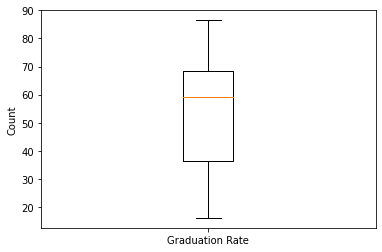

In [22]:
# Created a box and whisker for distribution of graduation rate
plot_gradrate = df_v2['GradRate']

columns = [plot_gradrate]

plt.boxplot(columns)
plt.xticks([1], ["Graduation Rate"])
plt.ylabel("Count")

## Create dummy variables

In [48]:
# Delete variable - clear to start over creating dummy components for correlation matrix
del df_v3

In [49]:
# Create dummy variables for independent variable Year
dummy_year = pd.get_dummies(df_v2['Year'], prefix='year')
dummy_year.head()

,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [50]:
# Creating v3 to populate the dummy variables and add the race dummy variables to the dataframe
df_v3 = pd.concat([df_v2, dummy_year], axis=1)

In [52]:
df_v3.shape

(360, 18)

In [53]:
# Create dummy variables for independent variable InstType
dummy_itype = pd.get_dummies(df_v2['InstLevel'], prefix='ILevel')

In [54]:
dummy_itype.head()

,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [55]:
# Add itype dummy variables to the dataframe
df_v3 = pd.concat([df_v3, dummy_itype], axis=1)

In [56]:
df_v3.shape

(360, 21)

In [57]:
# Create dummy variable for agg_Itype and add to dataframe
dummy_aggitype = pd.get_dummies(df_v2['agg_Itype'])
df_v3 = pd.concat([df_v3, dummy_aggitype], axis=1)

In [58]:
# Create dummy variable for agg_Stpop and add to dataframe
dummy_aggaid = pd.get_dummies(df_v2['agg_Stpop'])
df_v3 = pd.concat([df_v3, dummy_aggaid], axis=1)

In [59]:
df_v3.head()

,Year,InstType,StudPop,InstLevel,NumStudents,Completers,GradRate,agg_Itype,agg_Stpop,year_2010,...,year_2017,year_2018,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public,2-year,4-year,,No Aid,Yes Aid
0,2010,4-year institutions,All students,Public,1084594,593462,54.7,4-year,,1,...,0,0,0,0,1,0,1,1,0,0
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7,4-year,Yes Aid,1,...,0,0,0,0,1,0,1,0,0,1
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8,4-year,Yes Aid,1,...,0,0,0,0,1,0,1,0,0,1
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7,4-year,No Aid,1,...,0,0,0,0,1,0,1,0,1,0
4,2010,4-year bachelor's cohort,All students,Public,932667,551604,59.1,4-year,,1,...,0,0,0,0,1,0,1,1,0,0


In [60]:
# Create a dataframe for a heat map
df_heat_map = df_v3.drop(['Year','InstType','StudPop','InstLevel','agg_Itype','agg_Stpop',''], axis=1)
df_heat_map.reset_index(drop=True, inplace=True)

In [61]:
df_heat_map.head()

,NumStudents,Completers,GradRate,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public,2-year,4-year,No Aid,Yes Aid
0,1084594,593462,54.7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,421649,184115,43.7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,165031,97082,58.8,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,497914,312265,62.7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,932667,551604,59.1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [62]:
# Import more libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

Text(0.5, 1.0, 'Multi-Collinearity of Graduation Rates Attributes')

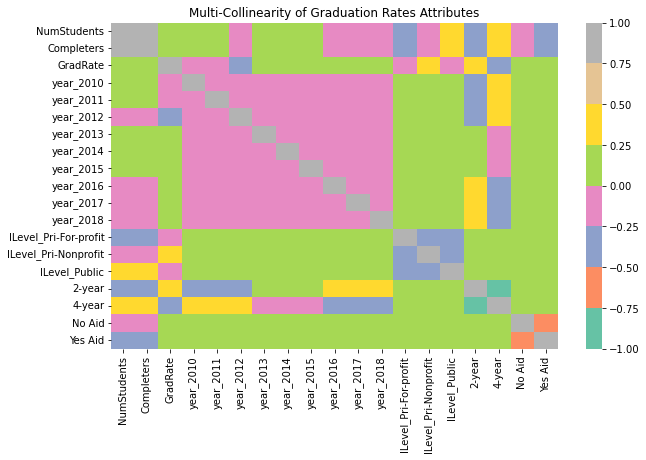

In [68]:
# created a heatmap to create a correlation of the data to compare with grad rates
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_heat_map.corr(), center=0, cmap='Set2')
ax.set_title('Multi-Collinearity of Graduation Rates Attributes')

## Prepare the Data for Modeling

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# splitting the data into training and testing dataframes
# creating X and y
X = df_heat_map.loc[:, df_heat_map.columns != 'GradRate']
y = df_heat_map['GradRate']

In [71]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)

In [99]:
X_train

,NumStudents,Completers,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public,2-year,4-year,No Aid,Yes Aid
250,10054,3415,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
312,571555,179383,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
341,39131,14244,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
284,28965,8811,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
21,186026,95637,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,228957,173582,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
192,599412,179205,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
117,88655,59655,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
47,14060,4323,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0


### Create a Linear Regression Model with GradRate and 2-year

In [92]:
# Create X and y values from the training data to test linear regression on 
# GradRate and ILevel_Pri-Nonprofit
X_lr = X_train['2-year']
X_lr = np.array(X_lr).reshape((-1, 1))
y_lr = y_train

In [93]:
y_lr.shape

(288,)

In [94]:
lr_model = LinearRegression()

In [95]:
lr_model.fit(X_lr, y_lr)

LinearRegression()

In [96]:
# Get results of Linear Regression
lr_r_sq = lr_model.score(X_lr, y_lr)
print('coefficient of determiniation:', lr_r_sq)

coefficient of determiniation: 0.1580586832713109


#### Observation - the coefficient of determination is 15% which means the 2-year school is not a good predictor of graduation rates and it's not a good fit for this model.

## Create a Multiple Linear Regression Model

In [100]:
# Create X and y values from the training data to test multiple linear regression 
X_mlr = X_train.iloc[:, :18].values
y_mlr = y_train.values

In [102]:
mlr_model = LinearRegression().fit(X_mlr, y_mlr)

In [103]:
# Get results of Multiple Linear Regression
mlr_r_sq = mlr_model.score(X_mlr, y_mlr)
print('coefficient of determination:', mlr_r_sq)

coefficient of determination: 0.6946719370060955


In [104]:
print('intercept:', mlr_model.intercept_)

intercept: 51.60458145317791


 ## Logistic Regression

In [148]:
del df_v4

In [149]:
# Dataset needed for logistic regression
df_v4 = df_v2[df_v2.StudPop != 'All students']

In [150]:
# Create dummy variable for agg_Itype and add to dataframe
dummy_aggitype = pd.get_dummies(df_v4['agg_Itype'])
df_v4 = pd.concat([df_v4, dummy_aggitype], axis=1)

In [151]:
# Create dummy variables for independent variable InstType
dummy_ilevel = pd.get_dummies(df_v4['InstLevel'], prefix='ILevel')
df_v4 = pd.concat([df_v4, dummy_ilevel], axis=1)

In [152]:
df_v4.head()

,Year,InstType,StudPop,InstLevel,NumStudents,Completers,GradRate,agg_Itype,agg_Stpop,2-year,4-year,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public
1,2010,4-year institutions,Received Pell Grant,Public,421649,184115,43.7,4-year,Yes Aid,0,1,0,0,1
2,2010,4-year institutions,"Received Direct Subsidized Loan, but not a Pel...",Public,165031,97082,58.8,4-year,Yes Aid,0,1,0,0,1
3,2010,4-year institutions,Received neither a Pell Grant or a Direct Subs...,Public,497914,312265,62.7,4-year,No Aid,0,1,0,0,1
5,2010,4-year bachelor's cohort,Received Pell Grant,Public,337195,164604,48.8,4-year,Yes Aid,0,1,0,0,1
6,2010,4-year bachelor's cohort,"Received Direct Subsidized Loan, but not a Pel...",Public,155734,94214,60.5,4-year,Yes Aid,0,1,0,0,1


In [153]:
# Create a dataframe for logistic Regression
df_v4 = df_v4.drop(['Year','InstType','StudPop','InstLevel','agg_Itype'], axis=1)
df_v4.reset_index(drop=True, inplace=True)
df_v4 = df_v4.replace('Yes Aid', 1)
df_v4 = df_v4.replace('No Aid', 0)

In [154]:
df_v4.head()

,NumStudents,Completers,GradRate,agg_Stpop,2-year,4-year,ILevel_Pri-For-profit,ILevel_Pri-Nonprofit,ILevel_Public
0,421649,184115,43.7,1,0,1,0,0,1
1,165031,97082,58.8,1,0,1,0,0,1
2,497914,312265,62.7,0,0,1,0,0,1
3,337195,164604,48.8,1,0,1,0,0,1
4,155734,94214,60.5,1,0,1,0,0,1


In [155]:
# splitting the data into training and testing dataframes
# creating X and y
X_lr = df_v4.loc[:, df_v4.columns != 'agg_Stpop']
y_lr = df_v4['agg_Stpop']

In [156]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(X_lr, y_lr, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)

In [157]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [158]:
#instantiate the logistic regression model 
logr_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logr = logr_model.fit(Xlr_train, ylr_train)

C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model Accuracy: 75.93%


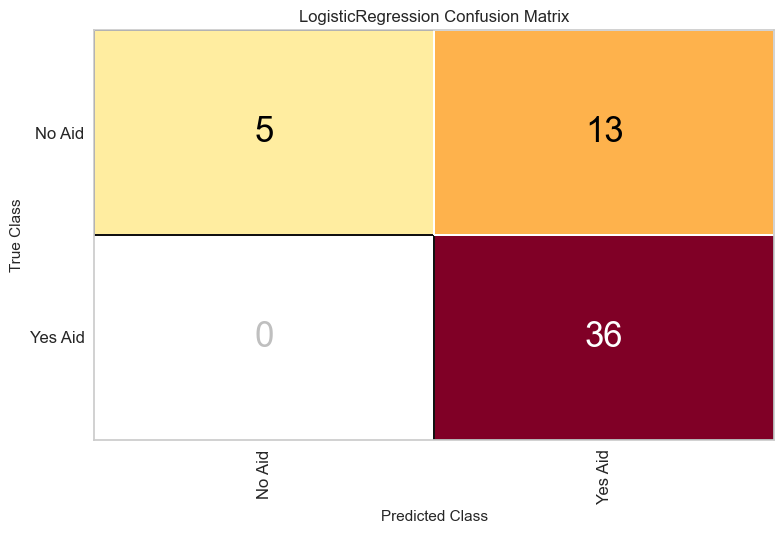

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [159]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['Did Not Survive','Survived']
label_encoder = {1:'Yes Aid', 0:'No Aid'}

#initialize the confusion matrix
cm = ConfusionMatrix(logr_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(Xlr_test, ylr_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(Xlr_test, ylr_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


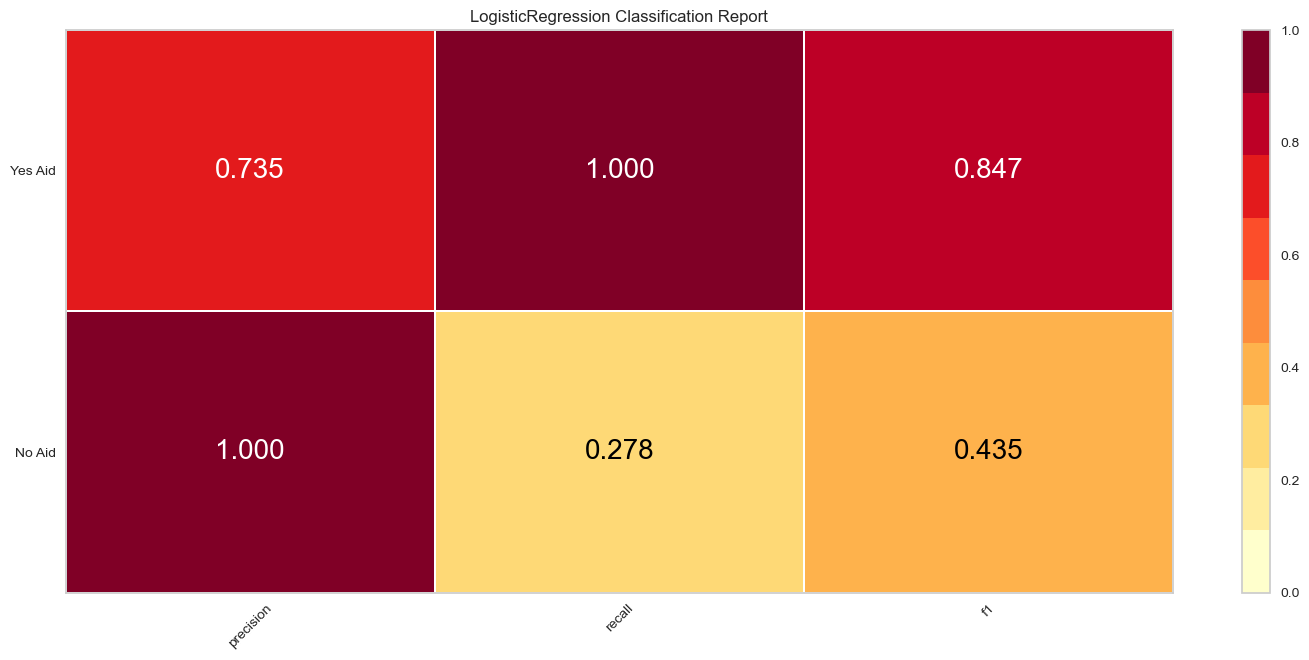

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [160]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logr_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(Xlr_train, ylr_test)  
#evaluate the model on the test data
class_report.score(Xlr_test, ylr_test)  
class_report.show()

C:\Users\kozfa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


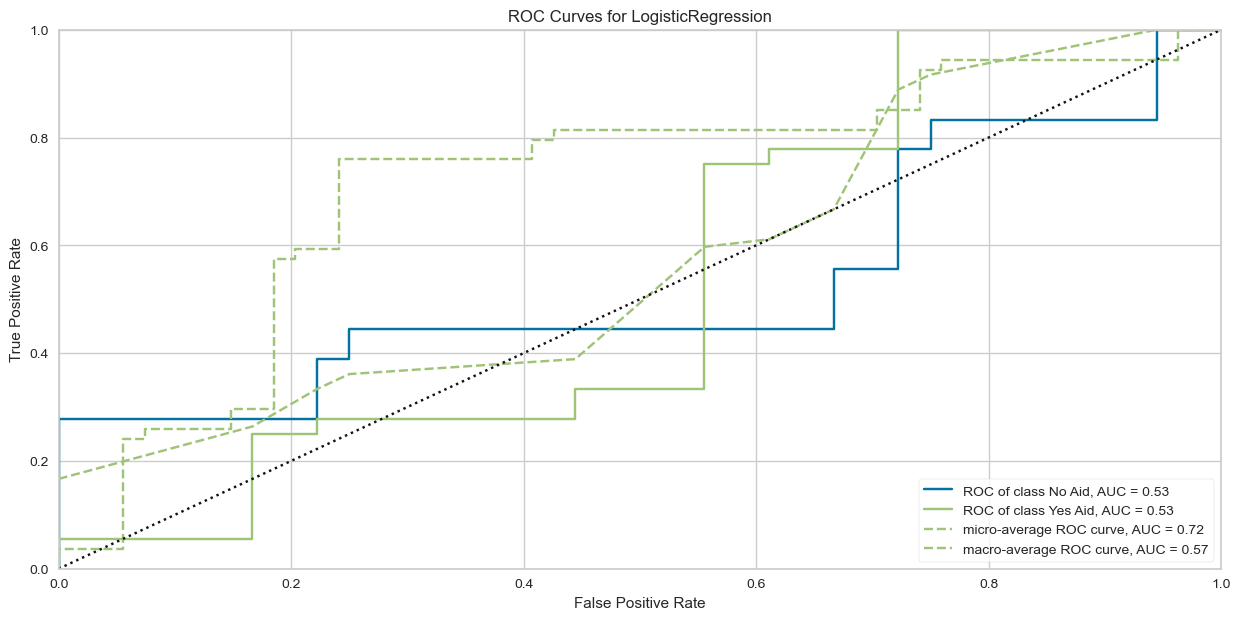

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [161]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logr_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(Xlr_test, ylr_test)
#evaluate the model on the test data
roc_curve.score(Xlr_test, ylr_test)  
roc_curve.show()